# Proceso de Análisis Exploratorio de los Datos (EDA)

# Importamos las librerías necesarias

In [1]:
import pandas as pd
import Funciones as F
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Lectura de archivos

In [2]:
primero = pd.read_csv('Datasets/incendios_2023.csv',sep=';')
segundo = pd.read_csv('Datasets/incendios_prov_2023_correcto.csv')
tercero = pd.read_csv('Datasets/focos_calor_año.csv',sep=';')
cuarto = pd.read_csv('Datasets/focos_calor_prov_2015_2023_correcto.csv')
quinto = pd.read_csv('Datasets/incendio_region_2023.csv',sep=';')
provincias_json = 'Datasets/ProvinciasArgentina.geojson'

## Análisis

Se llevará a cabo un análisis preliminar de los datos en cada dataframe, y posteriormente se profundizará mediante gráficos y diversas visualizaciones en Power BI.

In [3]:
primero

,mes,año_2020,año_2021,año_2022,año_2023
0,Enero,125,78,176,253
1,Febrero,82,31,133,122
2,Marzo,173,47,33,95
3,Abril,74,23,54,22
4,Mayo,92,17,51,19
5,Junio,100,29,133,36
6,Julio,242,376,409,118
7,Agosto,286,785,463,464
8,Septiembre,191,423,496,360
9,Octubre,143,328,288,448


Se elaborarán gráficos con el fin de visualizar la frecuencia de incendios por mes, con el objetivo de realizar un análisis detallado de los patrones de ocurrencia y sus posibles causas.

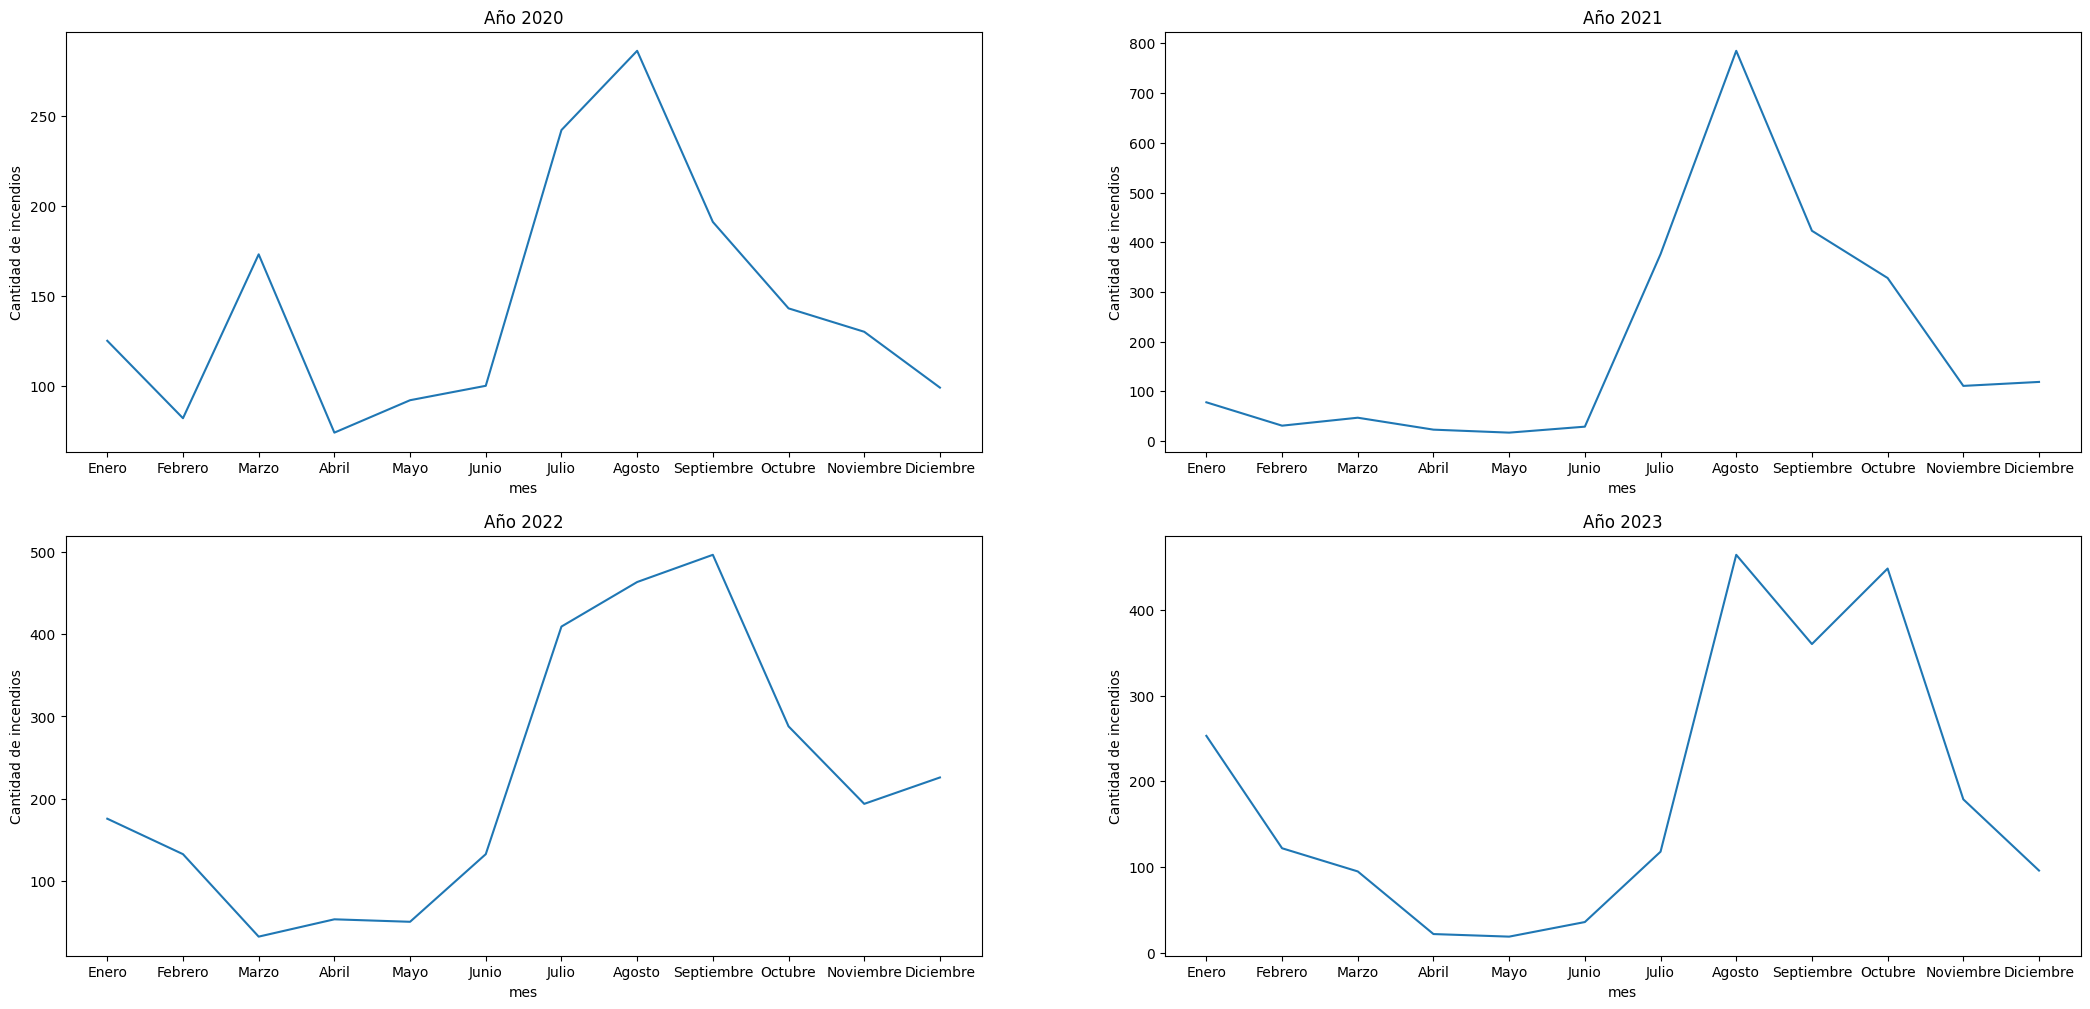

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(26, 12)) 
sns.lineplot(data=primero,y='año_2020',x='mes',ax=axes[0, 0])
axes[0, 0].set_title('Año 2020')
axes[0, 0].set_ylabel('Cantidad de incendios')
axes[0, 0].set_xlabel('mes')
sns.lineplot(data=primero,y='año_2021',x='mes',ax=axes[0, 1])
axes[0,1].set_title('Año 2021')
axes[0,1].set_ylabel('Cantidad de incendios')
axes[0,1].set_xlabel('mes')
sns.lineplot(data=primero,y='año_2022',x='mes',ax=axes[1, 0])
axes[1,0].set_title('Año 2022')
axes[1,0].set_ylabel('Cantidad de incendios')
axes[1,0].set_xlabel('mes')
sns.lineplot(data=primero,y='año_2023',x='mes',ax=axes[1, 1])
axes[1,1].set_title('Año 2023')
axes[1,1].set_ylabel('Cantidad de incendios')
axes[1,1].set_xlabel('mes')
plt.show()

Las conclusiones extraídas de estos gráficos son las siguientes:

- Las estaciones del año en las que se registran la mayor cantidad de incendios son el invierno y la primavera.

- Los picos de actividad se observan entre los meses de agosto a octubre.

- El año 2021 se destacó como el período con la mayor incidencia de incendios a nivel nacional, alcanzando su punto máximo en agosto con un total de 785 incendios.

- En contraposición, las estaciones de verano y otoño presentan una menor frecuencia de incendios.

- Los meses con la menor cantidad de incendios son de marzo a junio.



In [5]:
primero.describe()

,año_2020,año_2021,año_2022,año_2023
count,12.000000,12.000000,12.000000,12.000000
mean,144.750000,197.250000,221.333333,184.333333
std,66.591188,236.377635,160.799329,160.424059
min,74.000000,17.000000,33.000000,19.000000
25%,97.250000,30.500000,113.250000,80.250000
50%,127.500000,94.500000,185.000000,120.000000
75%,177.500000,340.000000,318.250000,279.750000
max,286.000000,785.000000,496.000000,464.000000


- En el análisis, se destaca que en el año 2022 se registra una mayor cantidad de incendios en promedio en comparación con los demás años, a pesar de que su mínimo se encuentra en la posición 2 en la lista, al igual que su máximo. 

- El año 2021 se caracteriza por ser el más variado en sus datos, mostrando una dispersión desigual entre los meses y un pico notable en agosto.  

- La mediana promedio de los cuatro años es de 132, lo que indica que la mitad de los valores en estos años se encuentran en este valor o por debajo de él.

- La dispersión de los datos en el año 2020 es la menor, mas adelante veremos un mapa de calor para ver la distribución de los datos.

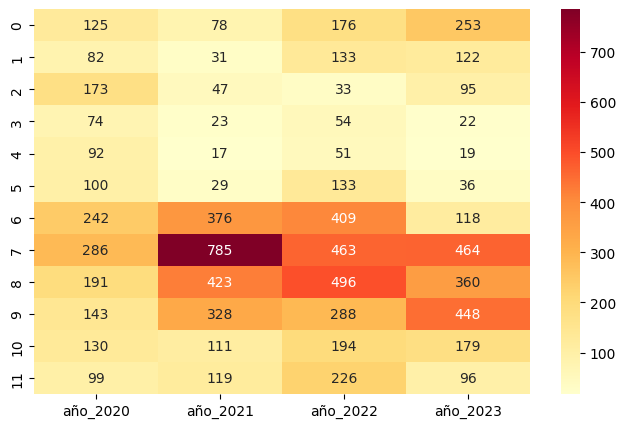

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(primero.drop('mes', axis=1), annot=True, cmap="YlOrRd", fmt="d")
plt.show()

Este mapa de calor ilustra los meses con mayor incidencia de incendios, representados por tonos amarillos (menor cantidad) a rojos (mayor cantidad).  
Como se mencionó previamente, el año 2021 destaca por la variación más significativa en sus datos, mientras que el año 2022 presenta valores elevados de manera más continua.  
Asimismo, se observan anomalías en las épocas donde generalmente se registran menos incendios, como es el caso del año 2023.

In [7]:
suma_primero = primero.sum(axis=1,numeric_only=True)
data_suma_primero= pd.DataFrame({'Mes':primero['mes'],'Total':suma_primero})
data_suma_primero


,Mes,Total
0,Enero,632
1,Febrero,368
2,Marzo,348
3,Abril,173
4,Mayo,179
5,Junio,298
6,Julio,1145
7,Agosto,1998
8,Septiembre,1470
9,Octubre,1207


En este acumulado del total de incendios por mes en los últimos cuatro años, se destaca claramente lo mencionado anteriormente: los periodos de invierno y primavera presentan valores por encima de los 1000 incendios.

Se ha incorporado una nueva función que exhibe el porcentaje que cada valor de la columna representa con respecto al total.

In [8]:
F.cantidad_porcentaje_sum(data_suma_primero,columna_valores='Total',columna_referencia='Mes')

El valor total de la columna Total es:

8972

El porcentaje que representa cada valor es:

           Mes  Porcentaje
0        Enero        7.04
1      Febrero        4.10
2        Marzo        3.88
3        Abril        1.93
4         Mayo        2.00
5        Junio        3.32
6        Julio       12.76
7       Agosto       22.27
8   Septiembre       16.38
9      Octubre       13.45
10   Noviembre        6.84
11   Diciembre        6.02


<div style="border-bottom: 1px dashed white;"></div>

In [9]:
segundo

,jurisdicción,año_2020,año_2021,año_2022,año_2023
0,Buenos Aires,63,39,60,37
1,CABA,0,0,0,1
2,Catamarca,164,242,188,288
3,Chaco,203,122,110,6
4,Chubut,46,40,39,87
5,Córdoba,96,71,144,140
6,Corrientes,58,14,106,89
7,Entre Ríos,30,58,143,62
8,Formosa,9,34,18,17
9,Jujuy,221,342,378,319


Se seleccionarán los seis primeros valores, habiéndose elegido aquellos que presentan más de 500 incendios acumulados en los cuatro años que estamos analizando, con el objetivo de extraer conclusiones significativas.

In [10]:
suma_segundo = segundo.sum(axis=1,numeric_only=True)
data_suma_segundo= pd.DataFrame({'Mes':segundo['jurisdicción'],'Total':suma_segundo})
data_suma_segundo_ordenado = data_suma_segundo.sort_values(by='Total',ascending=False).reset_index(drop=True)
top_6_segundo = data_suma_segundo_ordenado.head(6)
top_6_segundo

,Mes,Total
0,Tucumán,1299
1,Jujuy,1260
2,Catamarca,882
3,Salta,684
4,San Luis,582
5,Río Negro,512


En el próximo mapa, se visualizarán las provincias que anteriormente seleccionamos.

In [11]:
arg_location = [-38.416097, -63.616672]
mapa = folium.Map(location=arg_location,zoom_start=4,tiles="OpenStreetMap")
provincias = [{'name': 'Tucumán','location': [-26.8080, -65.2176]},
              {'name': 'Jujuy','location': [-23.5366, -64.6903]},
              {'name': 'Catamarca','location': [-28.4696, -65.7852]},
              {'name': 'Salta','location': [-24.7821, -65.4232]},
              {'name': 'San Luis','location': [-33.7578, -66.0321]},
              {'name': 'Río Negro','location': [-40.8135, -63.0181]},]
for provincia in provincias:
    folium.Marker(location=provincia['location'],popup=provincia['name']).add_to(mapa)
folium.GeoJson(provincias_json, name='geojson').add_to(mapa)
mapa

Se proporcionarán enlaces específicos para cada provincia, los cuales dirigirán a noticias relacionadas con los incendios:

Rio negro: [link 1](https://www.argentina.gob.ar/noticias/los-incendios-en-rio-negro-vistos-desde-el-espacio) [link 2](https://www.rionegro.com.ar/sociedad/el-parque-lanin-tambien-sufre-un-incendio-que-se-sabe-del-siniestro-3408891/)  

San Luis: [link](https://tn.com.ar/sociedad/2023/08/22/continuan-los-incendios-en-san-luis-con-varios-focos-activos-el-viento-dificulta-el-trabajo-de-los-bomberos/)

Salta: [link](https://www.infobae.com/sociedad/2022/09/13/incendios-forestales-en-salta-casi-4000-hectareas-afectadas-por-el-fuego-en-distintos-puntos-de-la-provincia/)  

Catamarca: [link](https://www.infobae.com/sociedad/policiales/2023/10/05/aumentaron-los-incendios-forestales-en-catamarca-y-arrasaron-2000-hectareas/)  

Jujuy: [link](https://www.todojujuy.com/pais/incendio-parque-los-alerces-el-viento-acelero-el-avance-del-fuego-n245839)  

Tucumán: [link](https://www.sol915.com.ar/reporte-oficial-los-incendios-argentina-sigue-fuego-la-provincia-tucuman/)

Además, se adjunta un PDF con información relevante del Servicio Nacional de Manejo del Fuego en Argentina. En este documento, se destacan en el mapa los incendios que fueron controlados, junto con la cantidad de hectáreas incendiadas y detalles adicionales sobre los incidentes.

Haz click para acceder al [PDF](enero_2024.pdf)




Conclusiones:

En los últimos años, se han registrado importantes focos de calor extremo en Argentina. En la siguiente imagen, podemos observar que las provincias con mayor cantidad de incendios están ubicadas en estas zonas de calor previamente mencionadas.

![imagen1](Imagenes/calor_extremo_mapa.jpg)  

- En las provincias donde se registran mayores incendios, se presentan los siguientes tipos de vientos:

    - Río Negro: Experimenta aire seco, y esta aridez, junto con extensos pastizales secos, crea un ambiente propicio para la ocurrencia de numerosos incendios.

    - San Luis, Catamarca y Tucumán: Estas provincias se ven afectadas por el viento Zonda, reconocido por elevar rápidamente las temperaturas, generar sequedad en la región y alcanzar velocidades de viento considerables, creando condiciones climáticas propicias para que un pequeño foco desencadene un gran incendio. Además, se ubican en zonas áridas con sierras y campos.

    - Salta y Jujuy experimentan vientos Zonda, caracterizados por su calor y sequedad, además de los vientos del norte tropicales que aportan humedad. Estos patrones de viento influyen en las variadas condiciones climáticas de estas provincias. Ambas se encuentran en el extremo norte de Argentina, lo que las convierte en las provincias más cálidas debido a su mayor cercanía al ecuador, donde la radiación solar incide más directamente durante el año.
    
Aquí se adjunta una imagen para facilitar la visualización de las corrientes de viento.

![imagen2](Imagenes/vientos_locales_de_Argentina.jpg)


<div style="border-bottom: 1px dashed white;"></div>

In [12]:
tercero

,año,cantidad_focos_de_calor
0,2015,140984
1,2016,166434
2,2017,184806
3,2018,170674
4,2019,145745
5,2020,405904
6,2021,164096
7,2022,287685


Aquí podemos observar el significativo incremento de focos de incendio que se produjo en el año 2020. Más adelante, realizaremos un gráfico de líneas para obtener conclusiones más detalladas.

In [13]:
F.cantidad_porcentaje_sum(tercero,'cantidad_focos_de_calor','año')

El valor total de la columna cantidad_focos_de_calor es:

1666328

El porcentaje que representa cada valor es:

    año  Porcentaje
0  2015        8.46
1  2016        9.99
2  2017       11.09
3  2018       10.24
4  2019        8.75
5  2020       24.36
6  2021        9.85
7  2022       17.26


Calcularemos la tasa de evolución de la cantidad de focos de incendios por año.

In [14]:
F.tasas_año(tercero,'cantidad_focos_de_calor',100)
tercero

,año,cantidad_focos_de_calor,Tasa,Tasa_anterior,Diferencia
0,2015,140984,8.46,0.00,0.00
1,2016,166434,9.99,8.46,1.53
2,2017,184806,11.09,9.99,1.10
3,2018,170674,10.24,11.09,-0.85
4,2019,145745,8.75,10.24,-1.49
5,2020,405904,24.36,8.75,15.61
6,2021,164096,9.85,24.36,-14.51
7,2022,287685,17.26,9.85,7.41


A continuación, realizaremos un gráfico para visualizar la evolución de la tasa de cantidad de focos de incendios por año.

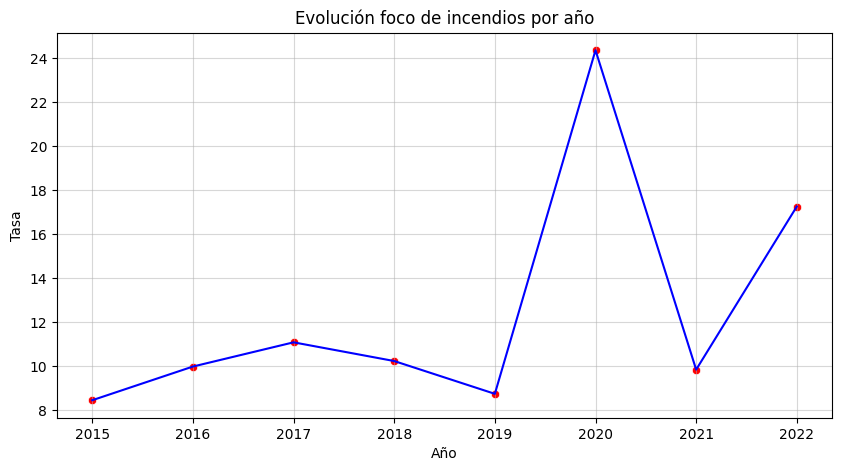

In [15]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(tercero,y='Tasa',x='año',color='blue')
sns.scatterplot(tercero,y='Tasa',x='año', color='red', marker='o')
plt.xlabel('Año')
plt.title('Evolución foco de incendios por año')
plt.grid(True,alpha=0.5)
plt.show()

En este gráfico, se aprecia fácilmente el aumento de focos de incendio en el año 2020. Este incremento podría estar relacionado con el contexto mundial de la pandemia de COVID-19, donde al principio existían restricciones de circulación, incluso para los servicios esenciales. Esto podría haber impactado significativamente en las cantidades, ya que muchos organismos se vieron afectados por la reducción de personal debido a enfermos de COVID-19 e, incluso, pérdidas de vidas. Además, algunas personas no se atrevían a salir de sus hogares por miedo a contagiar a sus familias. Estos factores, entre otros, contribuyeron a que no se pudieran controlar adecuadamente los focos de incendio, reflejándose en un aumento del 25% en comparación con los demás años.

<div style="border-bottom: 1px dashed white;"></div>

In [16]:
cuarto

,jurisdicción,año,total,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,Buenos Aires,2015,8267,787,543,913,836,455,758,824,463,1062,441,513,672
1,Catamarca,2015,722,6,4,3,5,18,24,46,83,173,274,44,42
2,Chaco,2015,10698,140,169,574,178,105,402,1211,1833,3996,1519,261,310
3,Chubut,2015,6293,169,3963,1870,24,11,13,9,17,10,64,127,16
4,CABA,2015,3,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Santa Cruz,2023,173,20,28,27,21,43,3,9,4,5,13,0,0
212,Santa Fe,2023,15553,1444,1173,876,768,850,813,1409,4465,1922,1833,0,0
213,Santiago del Estero,2023,9025,438,168,273,107,213,269,1137,2756,1971,1693,0,0
214,T. del Fuego,2023,51,7,5,3,7,13,5,4,4,2,1,0,0


Realizaremos un conteo de los valores en la columna 'jurisdicción' para verificar que todos los nombres estén escritos de la misma manera.

In [17]:
cuarto['jurisdicción'].value_counts()

jurisdicción
Buenos Aires           9
La Rioja               9
Tucumán                9
Santa Fe               9
Santa Cruz             9
San Luis               9
San Juan               9
Salta                  9
Neuquén                9
Catamarca              9
Mendoza                9
Misiones               9
La Pampa               9
Jujuy                  9
Formosa                9
Entre Ríos             9
Córdoba                9
Corrientes             9
CABA                   9
Chubut                 9
Chaco                  9
Río Negro              7
T. del Fuego           7
Stgo. del Estero       6
Santiago del Estero    3
RíoNegro               2
Tierra del Fuego       2
Name: count, dtype: int64

Observamos que algunas provincias están escritas de manera diferente, lo que está afectando los conteos. Procederemos a corregir tanto el dataframe original.

In [18]:
cuarto['jurisdicción'] = cuarto['jurisdicción'].replace('RíoNegro', 'Río Negro')
cuarto['jurisdicción'] = cuarto['jurisdicción'].replace('Stgo. del Estero', 'Santiago del Estero')
cuarto['jurisdicción'] = cuarto['jurisdicción'].replace('T. del Fuego', 'Tierra del Fuego')

Para comenzar con este dataframe, realizaremos una agrupación por provincia y sumaremos el total de los meses de los años comprendidos, desde 2015 hasta 2023.

In [19]:
agrupacion_por_prov = cuarto.groupby(by='jurisdicción')['total'].sum().sort_values(ascending=False).reset_index()
agrupacion_por_prov

,jurisdicción,total
0,Santa Fe,260116
1,Formosa,259540
2,Corrientes,195474
3,Chaco,161496
4,Santiago del Estero,152281
5,Entre Ríos,100336
6,Salta,92661
7,Buenos Aires,82773
8,La Pampa,69454
9,Río Negro,49590


- Como resultado, se pueden observar las siguientes conclusiones: 

    - Las cinco primeras provincias que presentan la mayor cantidad de focos se encuentran en la región norte del país, donde generalmente se experimentan climas con temperaturas muy altas.

    - El Distrito Federal de CABA presenta la menor cantidad con 22 focos en 8 años. Esto se debe, en primer lugar, a que no posee mucha flora y, además, a su pequeña dimensión territorial.

    - Se registran seis provincias con más de 100,000 focos en los últimos 8 años.

    - Las provincias de Santa Cruz, Tierra del Fuego y Chubut forman parte de las que registraron menos focos. Esto puede deberse a que sus climas suelen ser más fríos, ya que estas provincias tienen predominancia de vientos áridos y fríos.

Utilizando una función de nuestro propio módulo llamado 'funciones', calcularemos el total de focos de incendio a lo largo de este periodo que estamos estudiando, así como el porcentaje que representa cada provincia en cuanto a estos focos.

In [20]:
F.cantidad_porcentaje_sum(agrupacion_por_prov,'total','jurisdicción')

El valor total de la columna total es:

1723294

El porcentaje que representa cada valor es:

           jurisdicción  Porcentaje
0              Santa Fe       15.09
1               Formosa       15.06
2            Corrientes       11.34
3                 Chaco        9.37
4   Santiago del Estero        8.84
5            Entre Ríos        5.82
6                 Salta        5.38
7          Buenos Aires        4.80
8              La Pampa        4.03
9             Río Negro        2.88
10             Misiones        2.74
11              Córdoba        2.39
12              Tucumán        2.11
13             San Luis        2.06
14              Neuquén        2.03
15              Mendoza        2.00
16             La Rioja        0.91
17               Chubut        0.75
18            Catamarca        0.74
19                Jujuy        0.73
20             San Juan        0.70
21           Santa Cruz        0.17
22     Tierra del Fuego        0.05
23                 CABA        0.00


Aquí se puede observar cómo las conclusiones previamente realizadas se reflejan correctamente.

Vamos a utilizar la función 'describe' para obtener el promedio, los valores máximos y mínimos del dataframe.

In [21]:
agrupacion_por_prov.describe()

,total
count,24.000000
mean,71803.916667
std,78399.903081
min,22.000000
25%,12811.500000
50%,38831.500000
75%,94579.750000
max,260116.000000


- Observamos las siguientes conclusiones:

    - El conteo de las provincias y el Distrito Federal es correcto con un total de 24.

    - El promedio de focos de incendio es de 71,803, lo cual contrasta significativamente con el valor mínimo encontrado, que es de 22 focos. La dispersión de los datos es de 78,399, ya que contamos con 16 valores por debajo de este valor de dispersión.

    - El máximo se encuentra en la provincia de Santa Fe, que tuvo un total de 260,116 focos

Ahora procederemos a agrupar por provincia y mes para analizar en qué etapa del año cada provincia experimenta un aumento en la cantidad de focos de incendio.

In [22]:
agrupacion_por_prov_mes = cuarto.groupby(by=['jurisdicción'])[['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']].sum().reset_index()
agrupacion_por_prov_mes

,jurisdicción,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,Buenos Aires,11071,8177,7083,5012,3930,4870,5720,11903,9510,6204,4945,8070
1,CABA,4,3,5,0,1,2,1,1,2,0,3,1
2,Catamarca,412,190,242,143,236,468,1142,2447,2160,2424,2936,395
3,Chaco,6795,4765,5847,3939,2927,5794,16684,47670,39578,19652,7457,5789
4,Chubut,1607,5946,3478,97,81,77,65,153,136,249,267,725
5,Corrientes,19881,36226,10870,11065,6930,7363,19846,47040,21306,7418,5895,4333
6,Córdoba,1171,782,1027,954,1237,1422,2946,7481,11433,9498,3963,1391
7,Entre Ríos,6757,5650,5731,2726,3415,4046,11816,30885,13647,12100,4375,3839
8,Formosa,26728,10505,13544,6879,4851,4916,18420,65922,63693,32685,9522,6212
9,Jujuy,241,149,110,79,162,792,1058,1782,2734,3996,3780,776


Ahora procederemos a graficar los valores previamente obtenidos mediante gráficos de línea.

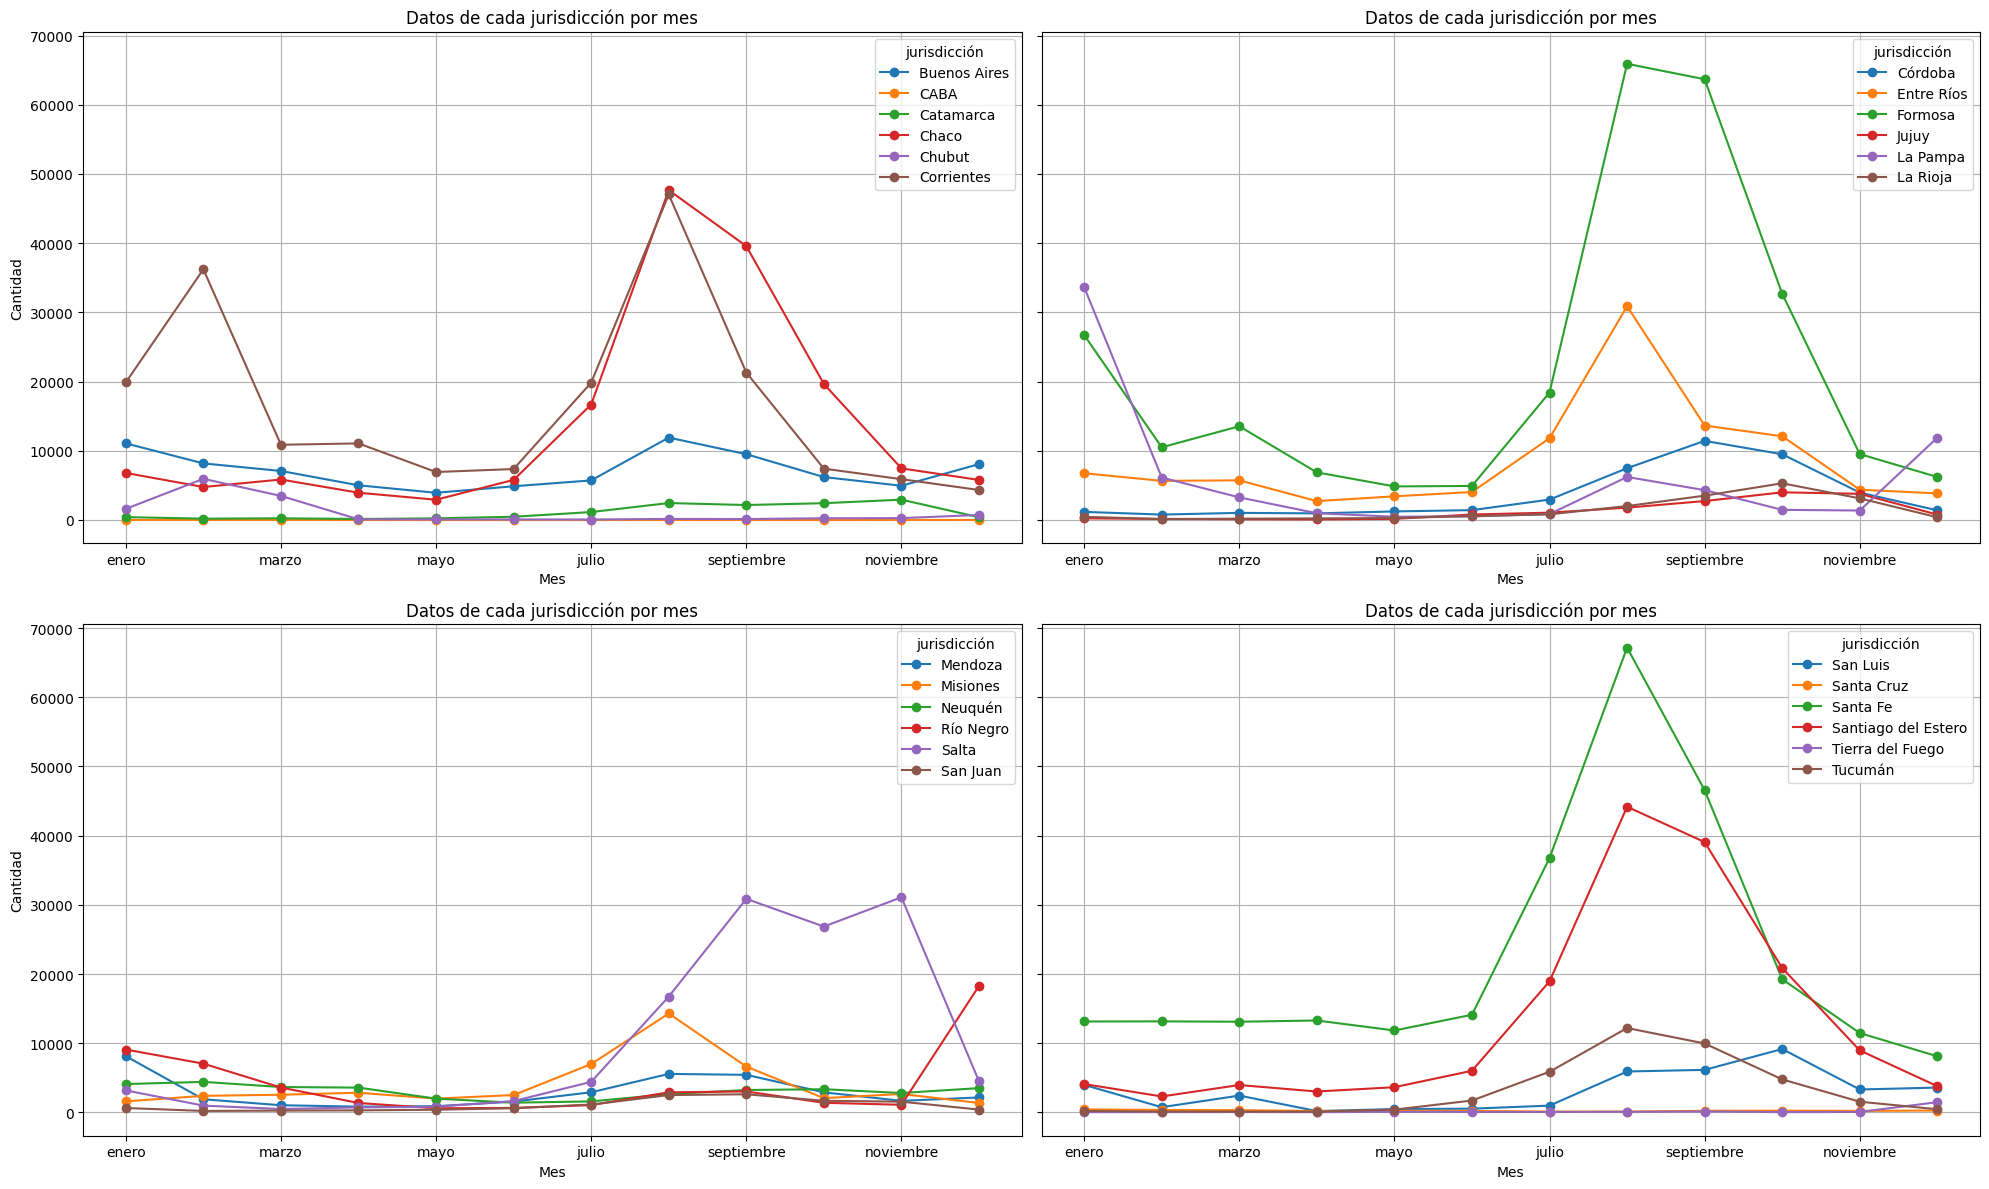

In [23]:
agrupacion_por_prov_mes.set_index('jurisdicción',inplace=True)

transpo = agrupacion_por_prov_mes.transpose()

provincia_1 = transpo.iloc[:,:6]
provincia_2 = transpo.iloc[:,6:12]
provincia_3 = transpo.iloc[:,12:18]
provincia_4 = transpo.iloc[:,18:24]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharey=True,figsize=(20,12))

provincia_1.plot(kind='line',marker='o',ax=ax1)
ax1.set_title('Datos de cada jurisdicción por mes')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Cantidad')
ax1.grid(True)

provincia_2.plot(kind='line', marker='o', ax=ax2)
ax2.set_title('Datos de cada jurisdicción por mes')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Cantidad')
ax2.grid(True)

provincia_3.plot(kind='line', marker='o', ax=ax3)
ax3.set_title('Datos de cada jurisdicción por mes')
ax3.set_xlabel('Mes')
ax3.set_ylabel('Cantidad')
ax3.grid(True)

provincia_4.plot(kind='line', marker='o', ax=ax4)
ax4.set_title('Datos de cada jurisdicción por mes')
ax4.set_xlabel('Mes')
ax4.set_ylabel('Cantidad')
ax4.grid(True)

plt.tight_layout()
plt.show()

- Tendencias de los gráficos respecto a focos de incendios en los últimos 8 años:

    - La mayoría de las provincias experimentan un aumento en el número de focos de incendio durante los meses de julio, seguido de un descenso a partir de septiembre.

    - La Pampa, Corrientes y Formosa presentan más focos que las demás provincias durante los meses de verano.

    - Al igual que en los demás gráficos, observamos que Formosa y Santa Fe dominan en la cantidad de focos de incendio.

    - Durante el primer semestre del año, se observa la menor cantidad de focos de incendio.